In [82]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [83]:
data=pd.read_csv('D:\Capstone Project-1\model\cardekho_updated.csv')
print(f'''number of rows - {data.shape[0]}
number of columns - {data.shape[1]}''')

number of rows - 19974
number of columns - 14


In [84]:
def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,new_price,object,10410,0.521178
3,year,int64,0,0.000000
4,seller_type,object,0,0.000000
5,km_driven,object,0,0.000000
6,owner_type,object,0,0.000000
7,fuel_type,object,0,0.000000
8,transmission_type,object,0,0.000000
9,mileage,object,160,0.008010


In [85]:
for i in range(data.shape[0]):
    try:
        price = float(data['selling_price'][i].split(' ')[0])
        digit = data['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            data['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            data['selling_price'][i] = price
    except:
        price = data['selling_price'][i][:-1]
        price = price.replace(',', '')
        data['selling_price'][i] = float(price)

C:\Users\harshil\AppData\Local\Temp\ipykernel_13824\1562082533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price'][i] = price
C:\Users\harshil\AppData\Local\Temp\ipykernel_13824\1562082533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price'][i] = float(price)
C:\Users\harshil\AppData\Local\Temp\ipykernel_13824\1562082533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price

In [86]:
data['full_name']=data['full_name'].str.split(' ').str.slice(0,3).str.join(' ')
data['km_driven'] = data['km_driven'].str.split(' ', n=1, expand=True)[0]
data['km_driven'] = data['km_driven'].str.replace(',','')
data['km_driven']=data['km_driven'].astype(int)
data['selling_price'] = data['selling_price'].apply(np.int64)
#data['mileage'] = data['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]
#data['engine'] = data['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]
#data['max_power'] = data['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]
#data['seats'] = data['seats'].str.split('s', expand=True)[1]

In [87]:
data


,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti
1,Hyundai Grand i10,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Hyundai
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,Hyundai
3,Maruti Alto K10,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,Maruti
4,Ford Ecosport 2015-2021,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,NaN,2017,Dealer,69480,First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5,NaN
19970,Maruti Ertiga BSIV,925000,NaN,2019,Dealer,18000,First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7,NaN
19971,Skoda Rapid 1.5,425000,NaN,2015,Dealer,67000,First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5,NaN
19972,Mahindra XUV500 W6,1225000,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,3800000,First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7,NaN


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  int64 
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  int32 
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
 13  company            19959 non-null  object
dtypes: int32(1), int64(2), object(11)
memory usage: 2.1+ MB


In [89]:
data['full_name']

0                Maruti Alto Std
1              Hyundai Grand i10
2               Hyundai i20 Asta
3                Maruti Alto K10
4        Ford Ecosport 2015-2021
                  ...           
19969      Toyota Platinum Etios
19970         Maruti Ertiga BSIV
19971            Skoda Rapid 1.5
19972         Mahindra XUV500 W6
19973          Honda City i-VTEC
Name: full_name, Length: 19974, dtype: object

#Cleaning

In [90]:
backup=data.copy()

In [91]:
data

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti
1,Hyundai Grand i10,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Hyundai
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,Hyundai
3,Maruti Alto K10,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,Maruti
4,Ford Ecosport 2015-2021,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,NaN,2017,Dealer,69480,First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5,NaN
19970,Maruti Ertiga BSIV,925000,NaN,2019,Dealer,18000,First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7,NaN
19971,Skoda Rapid 1.5,425000,NaN,2015,Dealer,67000,First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5,NaN
19972,Mahindra XUV500 W6,1225000,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,3800000,First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7,NaN


In [92]:
data=data.drop(['new_price', 'seller_type','owner_type','mileage','engine','max_power','seats'], axis=1)

In [93]:
data

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,2017,69480,Diesel,Manual,NaN
19970,Maruti Ertiga BSIV,925000,2019,18000,Petrol,Manual,NaN
19971,Skoda Rapid 1.5,425000,2015,67000,Diesel,Manual,NaN
19972,Mahindra XUV500 W6,1225000,2016,3800000,Diesel,Manual,NaN


In [94]:
data=data.reset_index(drop=True)

In [95]:
data

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,2017,69480,Diesel,Manual,NaN
19970,Maruti Ertiga BSIV,925000,2019,18000,Petrol,Manual,NaN
19971,Skoda Rapid 1.5,425000,2015,67000,Diesel,Manual,NaN
19972,Mahindra XUV500 W6,1225000,2016,3800000,Diesel,Manual,NaN


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  int64 
 2   year               19974 non-null  int64 
 3   km_driven          19974 non-null  int32 
 4   fuel_type          19974 non-null  object
 5   transmission_type  19974 non-null  object
 6   company            19959 non-null  object
dtypes: int32(1), int64(2), object(4)
memory usage: 1014.4+ KB


In [97]:
data.describe() # 2014-2021

,selling_price,year,km_driven
count,1.997400e+04,19974.000000,1.997400e+04
mean,7.392944e+05,2014.526134,5.823889e+04
std,9.104001e+05,3.248791,5.172760e+04
min,2.500000e+04,1991.000000,1.000000e+02
25%,3.400000e+05,2013.000000,3.111400e+04
50%,5.200000e+05,2015.000000,5.200000e+04
75%,7.850000e+05,2017.000000,7.400000e+04
max,3.950000e+07,2021.000000,3.800000e+06


In [98]:
data

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,2017,69480,Diesel,Manual,NaN
19970,Maruti Ertiga BSIV,925000,2019,18000,Petrol,Manual,NaN
19971,Skoda Rapid 1.5,425000,2015,67000,Diesel,Manual,NaN
19972,Mahindra XUV500 W6,1225000,2016,3800000,Diesel,Manual,NaN


In [99]:
#Downloading Dataset i.e Final Dataset
#from google.colab import files
#data.to_csv('data.csv') 
#files.download('data.csv')	


In [100]:
type(data['selling_price'])

pandas.core.series.Series

C:\Users\harshil\AppData\Local\Temp\ipykernel_13824\3586539341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False,


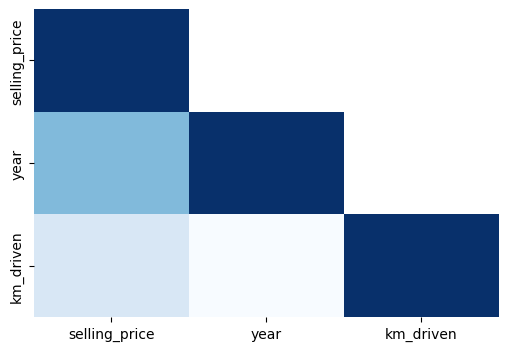

In [101]:
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(data.corr(), cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False,
                 annot_kws=dict(fontsize=18))
ax.set_facecolor('white')
ax.tick_params(labelsize=10)
plt.show()

In [102]:
data

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,2017,69480,Diesel,Manual,NaN
19970,Maruti Ertiga BSIV,925000,2019,18000,Petrol,Manual,NaN
19971,Skoda Rapid 1.5,425000,2015,67000,Diesel,Manual,NaN
19972,Mahindra XUV500 W6,1225000,2016,3800000,Diesel,Manual,NaN


#Model

In [103]:
X=data.drop(columns='selling_price')
y=data['selling_price']

In [104]:
X

,full_name,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...
19969,Toyota Platinum Etios,2017,69480,Diesel,Manual,NaN
19970,Maruti Ertiga BSIV,2019,18000,Petrol,Manual,NaN
19971,Skoda Rapid 1.5,2015,67000,Diesel,Manual,NaN
19972,Mahindra XUV500 W6,2016,3800000,Diesel,Manual,NaN


In [105]:
data['company'].tail(50)

19924            Honda
19925           Maruti
19926    Mercedes-Benz
19927            Honda
19928          Hyundai
19929           Toyota
19930           Maruti
19931           Maruti
19932           Maruti
19933           Maruti
19934       Volkswagen
19935             Land
19936          Hyundai
19937       Volkswagen
19938          Hyundai
19939           Datsun
19940             Tata
19941           Toyota
19942           Maruti
19943          Renault
19944           Maruti
19945           Maruti
19946            Honda
19947            Honda
19948          Hyundai
19949          Renault
19950    Mercedes-Benz
19951           Maruti
19952          Hyundai
19953          Hyundai
19954           Maruti
19955           Toyota
19956           Maruti
19957            Skoda
19958            Honda
19959              NaN
19960              NaN
19961              NaN
19962              NaN
19963              NaN
19964              NaN
19965              NaN
19966              NaN
19967      

In [106]:
data.drop(data.tail(15).index,inplace = True)

In [107]:
data

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,Ford
...,...,...,...,...,...,...,...
19954,Tata Zest Quadrajet,400000,2016,100000,Diesel,Manual,Maruti
19955,Toyota Innova Crysta,2350000,2018,21265,Diesel,Automatic,Toyota
19956,Maruti Alto 800,275000,2014,44000,CNG,Manual,Maruti
19957,Renault KWID Climber,484999,2017,29847,Petrol,Automatic,Skoda


In [108]:
data.to_csv('final.csv')

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [111]:
ohe= OneHotEncoder()
ohe.fit(X[['full_name','company','fuel_type','transmission_type']] )

OneHotEncoder()

In [112]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['full_name','company','fuel_type','transmission_type']),remainder='passthrough')

In [113]:
lr=LinearRegression()

In [114]:
pipe=make_pipeline(column_trans,lr)

In [115]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'DC', 'Daewoo', 'Datsun',
       'Fiat', 'Fo...
       'Maruti', 'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', nan],
      dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['full_name', 'company',
                                                   'fuel_type',
                                                   'transmission_type'])])),
                ('linearregression', LinearRegression())])

In [116]:
ohe.categories_

[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
        'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
        'Volvo XC90 D5'], dtype=object),
 array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'DC', 'Daewoo', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Maserati', 'Mercedes-AMG', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Opel', 'OpelCorsa', 'Porsche', 'Premier',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', nan],
       dtype=object),
 array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object)]

In [117]:
y_pred=pipe.predict(X_test)
y_pred

array([ 689973.25523369,  402882.19564283,  -97862.56353837, ...,
        603094.77015994, 1039123.7986811 ,  314436.17174597])

In [118]:
r2_score(y_test,y_pred)

0.3948950378921384

In [119]:
scores=[]
for i in range(19000):              #for 1000 data only 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

12202

In [ ]:
scores[np.argmax(scores)]

0.4615847545262006

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.4615847545262006

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame([['Ford Fiesta 1.5','Ford',2014,120000,'Petrol','Manual']],columns=['full_name','company','year','km_driven','fuel_type','transmission_type']))

array([201465.1193005])

In [ ]:
import pickle